In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
df = pd.read_csv(data)

## STEP 1_Prepare data
### •	Load and clean dataset: Import the dataset and check its structure
### •	Normalize data format: Standardize headers and string values for consistency

In [4]:
# checking data

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [7]:
len(df)

11914

In [8]:
# normalising headers' format

df.columns = df.columns.str.lower().str.replace(' ','_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
# normalising rest of data 

strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [11]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [12]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory analysis

## STEP 2_Perform exploratory data analysis (EDA)
### 	•	Explore and visualize distributions: Identify the distribution of key variables, such as msrp
### 	•	Handle skewed distributions: Use log transformation to address long-tail distributions
### 	•	Identify and handle missing values

In [13]:
for col in df:
    print(col)
    print(df[col].unique())
    print(df[col].nunique())
    print(df[col].value_counts())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
48
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysle

<AxesSubplot:xlabel='msrp', ylabel='Count'>

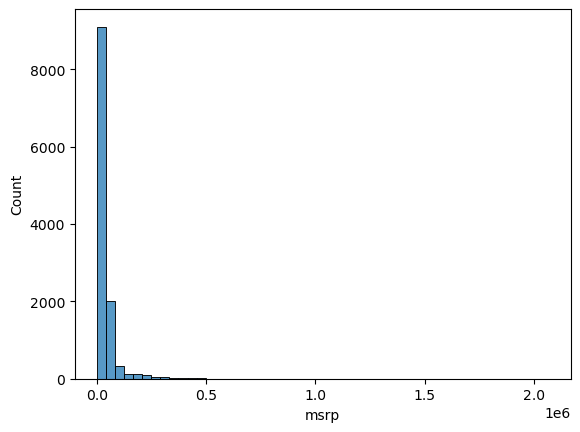

In [14]:
# checking the distribution of msrp (price)

sns.histplot(df.msrp, bins=50) # added bins in order to view it better / Long tail distribution since we are seeing that most of the cars are very cheap below 100k

<AxesSubplot:xlabel='msrp', ylabel='Count'>

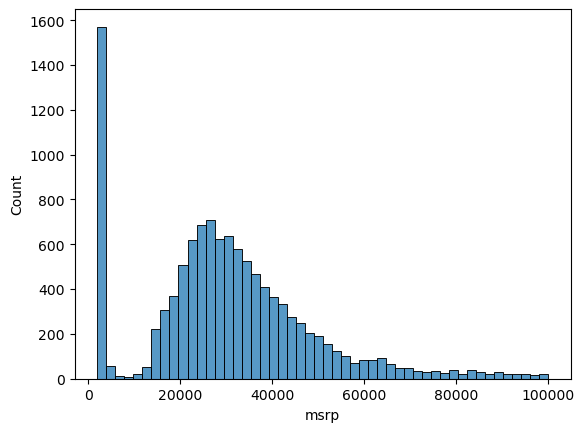

In [15]:
# zooming in in the largest bin >100k

sns.histplot(df.msrp[df.msrp <100000] , bins=50) 

In [16]:
# since this long tail distribution is not good for ml I will remove the tail i will apply the logarithmic distribution //// np.log1p([0, 1, 10, 1000, 100000])

price_logs = np.log1p(df.msrp)

In [17]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

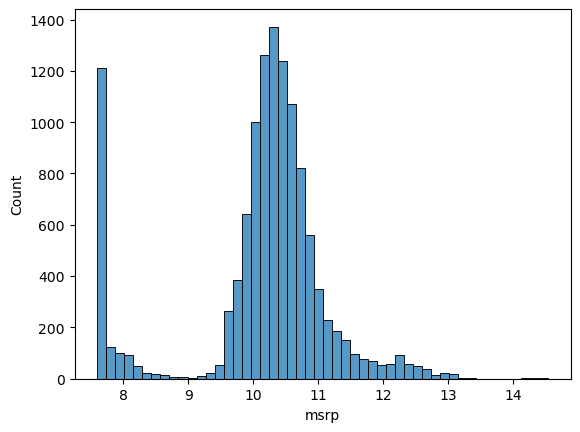

In [18]:
# replotting the histogram

sns.histplot(price_logs, bins=50)

In [19]:
# locating missing values

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up the validation framework

## STEP 3: Set Up Validation Framework

###	•	Split the dataset: Divide the data into training, validation, and test sets
###	•	Shuffle and reset indices: Randomize data order and prepare for model training
###	•	Log-transform target variable: Prepare target variable (msrp) for model compatibility

In [20]:
# splitting the df to validation, test and train sets

n = len(df)
n_val = int(len(df) * 0.2) # 20% for validation
n_test =  int(len(df) * 0.2) # 20% for testing
n_train = int(len(df) * 0.6) # 60% for training


In [21]:
# checking if the n matches the sum of n_val, n_test and n_train

n, n_val + n_test + n_train

(11914, 11912)

In [22]:
# becasue rounded up dfs are not matching i will use this method

n = len(df)
n_val = int(len(df) * 0.2)
n_test =  int(len(df) * 0.2)
n_train = n - n_val - n_test

In [23]:
n, n_val + n_test + n_train

(11914, 11914)

In [24]:
# checking size of each

n_val, n_test, n_train

(2382, 2382, 7150)

In [25]:
# creating the different dfs

df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [26]:
# checking results

df_train.head (10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [27]:
# setting up index in order to shuffle data

idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [28]:
# resetting the dfs based on new index

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [29]:
df_train.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
8001,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,22,873,17575
2882,bentley,continental_gtc,2013,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,24,14,520,191400
649,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,32,21,3916,76100
616,maybach,57,2012,premium_unleaded_(required),543.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury",large,sedan,16,10,67,379050
4459,ford,f-150_heritage,2004,regular_unleaded,202.0,6.0,manual,four_wheel_drive,2.0,NaN,large,regular_cab_pickup,18,13,5657,26030


In [30]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [31]:
# resetting the index since it's not necessary

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [32]:
# setting y variable (applying logarithmic to prepare the msrp column)

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values) 

In [33]:
# removing msrp variable from df_train

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [34]:
# checking the length of the y

len(y_train)

7150

# Implementing linear regression

## STEP 4: Implement Linear Regression
### • Implement linear regression to understand how weights and biases work
### • Perform calculations manually for a single instance
### • Use vectorized operations to improve efficiency

### Implementing first a linear regression for 1 value #10 as a simple task

In [35]:
# selecting the value

df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [36]:
xi = [453, 11, 86]

In [37]:
w0 = 7.17 
w = [0.01, 0.04, 0.002]

In [38]:
 def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [39]:
linear_regression(xi)

12.312

In [40]:
# reversing the logarithmic i applied earlier to see the prediction price

np.exp(12.312)-1 # or np.expm1(12.312) instead of writting the -1

222347.2221101062

# Implementing linear regression for vector form

In [41]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + w[j] * xi[j]
    
    return res

In [42]:
 def linear_regression(xi):
        
    return w0 + dot(xi, w)

In [43]:
# creating new vector with weights

w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [44]:
 def linear_regression(xi):
    xi = [1] + xi
    
    return dot(xi, w_new)

In [45]:
linear_regression(xi)

12.312

## Implementing linear regression for matrix vector

In [46]:
w0 = 7.17 
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [47]:
# creating the matrix with X becoming a list of lists

x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X  = [x1, x2, x10]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [48]:
# and then turning them into a matrix with np

X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [49]:
# doing multiplication between matrix and vector to get the price prediction

def linear_regression(X):
    return X.dot(w_new)

In [50]:
linear_regression(X) # the output of the linear regression is the weight vector

array([12.38 , 13.552, 12.312])

# Training a linear regression model

## STEP 5: Train Linear Regression Model
### • Train the linear regression model on numerical features
### • Apply matrix operations to calculate optimal weights
### • Build the Normal Equation for weight calculation

In [51]:
# becasue in this case X (as seen above) is with more columns than rows the Inverse probably doesn't exist so creating a new matrix

X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 1385],
    [142, 25, 431],
    [453, 31, 86],
]

X  = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54, 1385],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [52]:
# first implementint the Gran matrix from the formula :  w = (X^TX)^{-1} X^T y

XTX = X.T.dot(X)
XTX

array([[ 696471,   44115,  764140],
       [  44115,    7146,  183603],
       [ 764140,  183603, 8243986]])

In [53]:
# finding the inverse of the XTX

XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.59431786e-06, -2.29959598e-05,  2.71677457e-07],
       [-2.29959598e-05,  5.30958852e-04, -9.69355182e-06],
       [ 2.71677457e-07, -9.69355182e-06,  3.12005089e-07]])

In [54]:
# checking if the dot product of them (mnultiplication) gives me an I matrix

XTX.dot(XTX_inv).round(1)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [55]:
# multiplying with X transpose but also need to define y to find the w

y = [100, 200, 150, 250, 100, 200, 150, 250, 120]
w = XTX_inv.dot(X.T).dot(y)
w

array([0.28546804, 2.79664988, 0.02854919])

In [56]:
# adding the Bias term which gives us a baseline of how much the car should cost if we don't anything about this car (if missing there is nothing to base our prediction on)

ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
# adding the two vector and matrix together 

np.column_stack([ones, X])

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.385e+03],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [58]:
# changing them to lists to see the results

list(np.column_stack([ones, X]))

[array([1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03]),
 array([1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03]),
 array([  1., 453.,  11.,  86.]),
 array([  1., 158.,  24., 185.]),
 array([  1., 172.,  25., 201.]),
 array([  1., 413.,  11.,  86.]),
 array([1.000e+00, 3.800e+01, 5.400e+01, 1.385e+03]),
 array([  1., 142.,  25., 431.]),
 array([  1., 453.,  31.,  86.])]

In [59]:
# overwriting with the new X and re running the trainning model again 

X = np.column_stack([ones, X])

In [60]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [61]:
XTX = X.T.dot(X)

In [62]:
XTX_inv = np.linalg.inv(XTX)

In [63]:
# re naming the w since contains all weights

w_full = XTX_inv.dot(X.T).dot(y)

### Normal Equation formula 

### XTX = X.T.dot(X)
### XTX_inv = np.linalg.inv(XTX)
### w_full = XTX_inv.dot(X.T).dot(y)

In [64]:
# decomposing w_full between the bias and the rest

w0 = w_full[0]
w  = w[1:]

In [65]:
w0, w

(283.41521201332296, array([2.79664988, 0.02854919]))

In [66]:
# setting the training in a function

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [67]:
# gives us same results

train_linear_regression(X, y) 

LinAlgError: Singular matrix

# Using the training model to build the baseline model

## STEP 6: Build Baseline Model
### • Select a subset of key numerical features to create a simple baseline model
### • Train the model and evaluate its initial performance
### • Calculate RMSE to establish a benchmark for future improvements

In [68]:
# checking the df_train in order to extract all the numerical columns

df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [69]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [70]:
# creating a list with the relevant columns (engine_hp, engine_cylinders, highway_mpg, city_mpg and popularity)

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [71]:
# exrtracting the values from the columns

X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [72]:
# training the model

train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [73]:
# checking for missing values as i get NaN

df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [74]:
# filling them with 0 in order to ignore these features I

df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [75]:
# setting the X_train

X_train = df_train[base].fillna(0).values

In [76]:
# re training the model

train_linear_regression(X_train, y_train)

(7.927257388069998,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [77]:
w0, w = train_linear_regression(X_train, y_train)

In [78]:
# applying the same model i trained to get predictions

y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

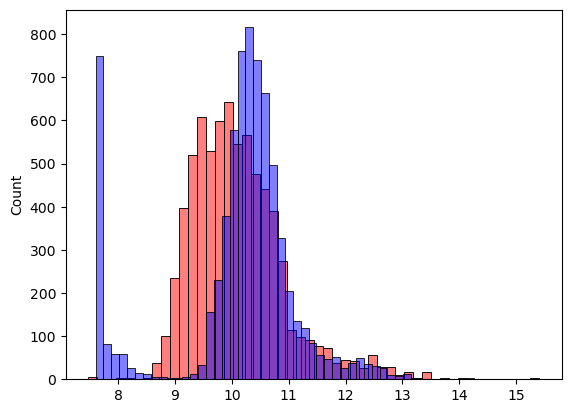

In [79]:
# plotting the predictions to see if they're similar to the target variable PRICE i want to predict // alpha is for transparency

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## RMSE => Root Mean Square Error (estimation of prediction accuracy of the target value)

### formula for RMSE  : $$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (g(x_i) - y_i)^2}
$$

In [80]:
# calculating the RMSE

def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [81]:
rmse(y_train, y_pred)

0.7554192603920132

### calculating the RMSE simplified

#### def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

# Validating the model with the RMSE

## STEP 7: Evaluate Model Performance
### • Compare baseline predictions with actual target values
### • Plot histograms of predictions vs actual values for visualization
### • Calculate RMSE on validation set to assess generalization

#### Previously i applied the RMSE to the training set as an example but it has to be applied to the validation set

#### Code for training the training model

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train.linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [82]:
# preparing the feature matrix X (breaking down the: X_train = df_train[base].fillna(0).values )

def prepare_X(df):
   df_num = df[base] # choosing the numberical values
   df_num = df_num.fillna(0) # filling in the NaN values with 0
   X = df_num.values # extracting the feature matrix np array
   return X

In [83]:
# training the train matrix (X_train)

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [84]:
# training the matrix again but now the validation matrix (X_val)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [85]:
# finally calculating the rmse

rmse(y_val, y_pred)

0.7616530991301591

## Simple feature engineering (adding new features in the model)

In [86]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


#### since year it's one of the most important variable to compute the price of a car i will use that feature to find the age of the car

In [87]:
# checking when these data were collected

df_train.year.max()

2017

In [88]:
# computing how old cars are

2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [89]:
# adding a the age feature in the matrix 

def prepare_X(df):
    df = df.copy() # creating a copy of the original df to avoid errors
    
    df['age'] = 2017 - df.year # using df o be added in all dfs
    features = base + ['age'] # adding age into the base for the matrix
    
    df_num = df[features]
    df_num = df_num.fillna(0) 
    X = df_num.values
    return X

In [90]:
# training the train matrix (X_train)

X_train = prepare_X(df_train)

In [91]:
df_train.columns # age is not part of the df_train but it will be added as  a feature in the X_train

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [92]:
# re training the train matrix (X_train) including age

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [93]:
# re training the matrix again 

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [94]:
# finally calculating the rmse and should have better results

rmse(y_val, y_pred)

0.5172055461058329

#### our model improved a lot as it went from 0.7616530991301591 to 0.5172055461058329 
checking the histograms again will visualise also the improvement

<AxesSubplot:ylabel='Count'>

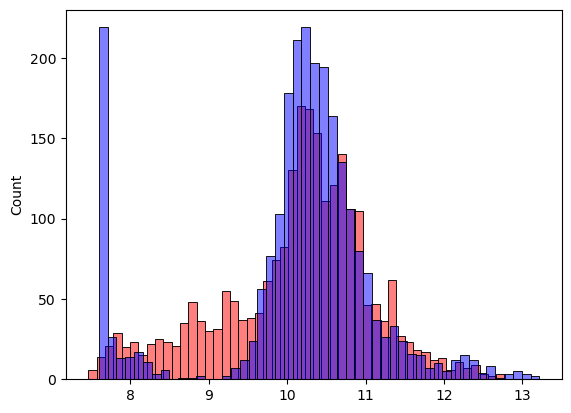

In [95]:
# plotting the predictions to see the change (using y_val to predict on the df_val instead of the training)

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

#### now the shape of the distribution is a lot closer. There are still discrepancies in certain parts but i will add more features in order to correct it

# Adding categorigal variables in the model

## STEP 8: Feature Engineering
### • Add new features and enhance model's predictive power
### • Include derived features like 'age' and handle categorical variables
### • Re-train model with additional features and assess improvement

In [96]:
# checking which are the categorical variables

df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [97]:
# number_of_doors is a categorical one even though is a float.
df_train.number_of_doors

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [98]:
# the typical way of encoding such variables is binary code 

# df_train['num_doors2'] = (df_train.number_of_doors == 2).astype('int')
# df_train['num_doors3'] = (df_train.number_of_doors == 3).astype('int')
# df_train['num_doors4'] = (df_train.number_of_doors == 4).astype('int')

# or write a loop

for v in [2,3,4]:
    df_train['num_doors_%s'%v] = (df_train.number_of_doors == v).astype('int')


In [99]:
# adding a the num_doors feature in the matrix 

def prepare_X(df):
    df = df.copy() # creating a copy of the original df to avoid errors
    features = base.copy() # creating copy in order not to add it everytime i add a feature
    
    df['age'] = 2017 - df.year # using df o be added in all dfs
    features.append('age') # using append instead of creating a new base everytime
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0) 
    X = df_num.values
    return X

In [100]:
# checking if added the new variables

prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [101]:
# re training the train matrix (X_train) including age

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# re training the matrix again 

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# finally calculating the rmse and should have better results

rmse(y_val, y_pred)

0.5157995641502929

#### the result shows it resulted only slightly therefore i will add also the make valriable in the model

In [102]:
# checking the 5 most popular variables in the 'make'

df.make.value_counts().head()

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [103]:
# taking the index(here names) in order to use the values in the matrix

makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [106]:
# including them in the df

def prepare_X(df):
    df = df.copy() # creating a copy of the original df to avoid errors
    features = base.copy() # creating copy in order not to add it everytime i add a feature
    
    df['age'] = 2017 - df.year # using df o be added in all dfs
    features.append('age') # using append instead of creating a new base everytime
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0) 
    X = df_num.values
    
    return X

In [107]:
# re training the train matrix (X_train) including age

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# re training the matrix again 

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# finally calculating the rmse and should have better results

rmse(y_val, y_pred)

0.5076038849555178

#### there is some positive improvement but i will continue to add the rest of the categorical features

In [125]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int64
num_doors_3            int64
num_doors_4            int64
dtype: object

In [126]:
# adding all the coategpries except from model since there are way too many

categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [127]:
# picking the top 5 values for all categories as an index by creating a dictionary 

categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [128]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [129]:
# including them in the df

def prepare_X(df):
    df = df.copy() # creating a copy of the original df to avoid errors
    features = base.copy() # creating copy in order not to add it everytime i add a feature
    
    df['age'] = 2017 - df.year # using df o be added in all dfs
    features.append('age') # using append instead of creating a new base everytime
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for c, values in categories.items(): # i do this for key value pairs of the dictionary
        for v in values: # doing another loop over the values
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
    
    df_num = df[features]
    df_num = df_num.fillna(0) 
    X = df_num.values
    
    return X

In [130]:
# re training the train matrix (X_train) including the rest of the c variables

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# re training the matrix again 

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# finally calculating the rmse and should have better results

rmse(y_val, y_pred)

25.412629215793995

#### this variable is considerably higher that what we had before 0.5076038849555178
that means something went wrong

In [131]:
# checking at the values of the weights

int(w0)

-11109161159539054

In [132]:
# the w0 is very big numbers so checking also the w

w

array([-2.13373362e-01,  1.10561281e+01, -9.65772815e-01, -1.12249773e+00,
       -8.23555687e-04, -1.41371916e+00, -2.33494504e+03, -2.35799356e+03,
       -2.33861090e+03,  2.14819964e+00,  5.17134322e+00, -2.55218926e+00,
        5.20664261e+00,  2.79216432e+00,  4.20660808e+01,  5.77915718e+01,
        5.48488528e+01,  5.45808852e+01,  5.88071484e+01,  1.18450016e+16,
        1.18450016e+16,  1.18450016e+16,  1.18450016e+16,  1.18450016e+16,
       -7.35840482e+14, -7.35840482e+14, -7.35840482e+14, -7.35840482e+14,
       -2.67891613e+00, -9.09884493e-01,  2.32798730e+00,  1.92998063e+00,
        5.18995227e+00, -2.26730560e+00, -9.38900950e+00, -1.57379474e+01,
       -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
       -1.64412078e-01])

In [133]:
#### i see that some of them are very large such as below so something went wrong from all the new variables instead of making it better it made it worst 

int(-6.48105824e+14)

-648105824000000

# Regularisation

## STEP 9: Address Overfitting with Regularization
### • Identify overfitting issues caused by high weights or poor validation performance
### • Use regularization (L2) to stabilize model weights and prevent overfitting
### • Tune regularization parameter (`r`) for optimal performance

#### when in a matrix there are columns with same results then it is not possible to inverse it and returns error 'Singular Matrix' and can't compute. In my case above is similar problem. Here the data have noise which means they are not the same but they have very minicule differences causing the system not to produce a 'Singular matrix' error but to compute the inverse but resulting in huge numbers.

In order to resolve the issue we need to add a small number to the diagonal of this matrix. This solution works because adding a number on the diagonal avoids having duplicate numbers in the columns. We do that by adding the .eye matrix into our matrix. 

Regularisation = controlling the weights so they don't grow too much. The larger the value we add in the diagonal the smaller the value on the returned matrix. The .eye becomes a parameter, how much regularisation we add in our matrix

In [134]:
# re implementing the function from before by slightly changing it by adding the new parameter r

def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) # adding parameter r to the diagonal
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [135]:
# re training the train matrix (X_train) after adding the r

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.01) # here i will experiment with different values to see which one matches best

# re training the matrix again 

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# finally calculating the rmse and should have better results

rmse(y_val, y_pred)

0.4565219901261994

#### result is an improvement even from the original rmse we had before 0.5076038849555178 now i need to fine tune the model by finding the best parameter value

## Tuning the model

In [136]:
# using the validation set to find the most suitable r value

for r in [0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]: # trying a bunch of values
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r = r) # try every r from the list

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred) # adding score to print it as results
    
    print(r, w0, score)

0 -1.1109161159539054e+16 25.412629215793995
1e-05 6.74223901756042 0.45651702949179446
0.0001 6.262715735879977 0.4565170627023682
0.001 6.285463675225584 0.4565175089541788
0.1 6.191208666746938 0.4565692762984807
1 5.634896668152411 0.4572204317993698
10 4.283980108943678 0.47014569320989125


#### Analysisng outcome:
- The first case (r = 0) shows a very high RMSE (25.4126), indicating that the model is severely overfitting without regularization

- For the remaining r values, the RMSE is much smaller and quite similar

- The lowest RMSE occurs at r = 1e-05 (0.4565). It is very close to the RMSE values for r = 0.0001 and r = 0.001

- As best result i will choose the smallest r that achieves that RMSE to avoid adding unnecessary regularization

In [138]:
# retraining the model with best value r = 1e-05

r = 1e-05
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)

print(score)

0.45651702949179446


# Training the final model and use it

## STEP 10: Train Final Model and Evaluate on Test Set
### • Combine training and validation sets to train final model
### • Use optimal hyperparameters for full model training
### • Evaluate final model performance on the test set for generalizability

I will train the final model now on both df_train + df_val and then apply it to predict the price on the df_test

In [139]:
# combining both df_train and df_val in one set

df_full_train = pd.concat([df_train, df_val])

In [142]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,NaN,NaN,NaN
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,NaN,NaN,NaN
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,NaN,NaN,NaN
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,NaN,NaN,NaN


In [145]:
# reset the index since it's still from the df_val

df_full_train = df_full_train.reset_index(drop = True)

In [146]:
# checking outcome

df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,NaN,NaN,NaN
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,NaN,NaN,NaN
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,NaN,NaN,NaN
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,NaN,NaN,NaN


In [148]:
# using the prepare function as defined earlier to get the matrix

X_full_train = prepare_X(df_full_train)

In [149]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [150]:
# joining the y_train, y_val for arrays

y_full_train = np.concatenate([y_train, y_val])

In [151]:
# checking outcome

y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [154]:
# training the model

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 1e-05)

In [155]:
w

array([ 1.52501517e-03,  1.18183675e-01, -6.66276954e-03, -5.33565845e-03,
       -4.87604215e-05, -9.69101899e-02, -7.94066393e-01, -8.92321935e-01,
       -6.36547466e-01, -4.14318650e-02,  1.75561853e-01, -5.82436529e-04,
       -1.00561958e-01, -9.27556703e-02, -4.66926501e-01,  7.98014166e-02,
       -3.16115533e-01, -5.52049429e-01, -7.89999075e-02,  9.07059551e+00,
        8.89528642e+00,  9.12486986e+00,  1.06280581e+01,  8.48524746e+00,
        1.85763768e+00,  1.75833689e+00,  1.84550900e+00,  1.77350891e+00,
       -9.70583430e-02,  3.73033736e-02, -5.81758563e-02, -2.35909767e-02,
       -1.19296796e-02,  2.18927562e+00,  2.07490592e+00,  2.05948566e+00,
       -5.00782183e-02,  5.62147572e-02,  1.84795563e-01,  3.32645385e-01,
       -1.58805558e-01])

In [156]:
# preparing df_test

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

0.4517745024778433

#### the rmse result is almost the same as the previous one 0.45651702949179446 which means that it works

# Using the model to predict prices by picking any car from the df_test to predict the price

## STEP 11: Make Predictions with Final Model
### • Use the trained model to make predictions on new instances
### • Reverse any transformations (e.g., log) for interpreting predictions
### • Validate prediction accuracy with actual known values

In [157]:
df_test.iloc[20]

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 20, dtype: object

In [159]:
# extracting the required variables as a dictionary since this is as it will be coming from the end user (app, website)

car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [160]:
# converting the dictionary to a df in order to use it in the prepare function 

df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [162]:
# using the car df in the prepare funciton 

X_small = prepare_X(df_small)
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [166]:
# getting the prediction for the car

y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0] # taking the first number of the array which is the prediction
y_pred

10.462660644812976

In [167]:
# taking the explonent value as previously i used the logarithmic

np.expm1(y_pred)

34983.50908108415

In [168]:
# checking the actual value of the car to review accuracy of model

y_test[20]

10.463131911491967

In [170]:
# taking the explonent value

np.expm1(y_test[20])

35000.00000000001

# Excellent result!